In [3]:
# !pip install osmnx

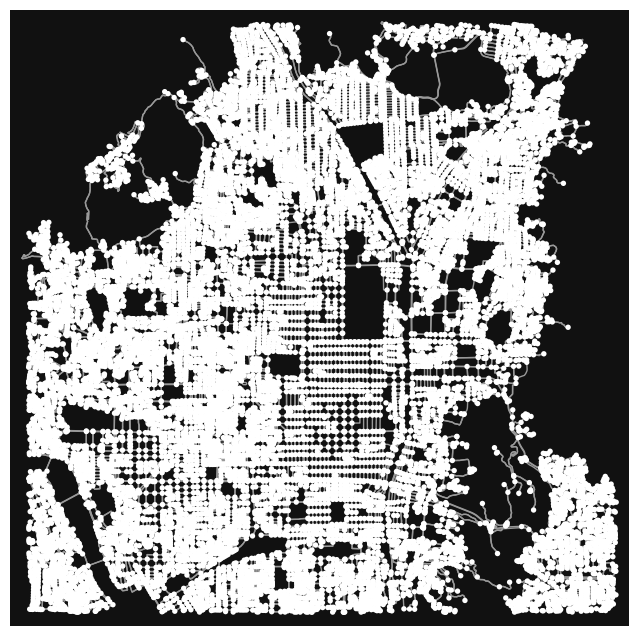

In [4]:
import osmnx as ox
# Code to retrieve street network and angles
G=ox.graph_from_address('Kyoto,Japan',network_type='drive',dist=5000)

ox.bearing.add_edge_bearings(G)

ox.plot_graph(G)

#turn graph into a geodataframe
edgeDF=ox.graph_to_gdfs(G,nodes=False)

#sample from this edgelist dataframe

In [5]:
import pandas as pd

file = pd.read_csv('kyoto/all_final.csv')
file.head()

,Unnamed: 0.1,Unnamed: 0,u,v,osmid,long,lat,bearing,geometry,pred,invalid
0,0,0,224811793,304191179,117159125,135.752295,35.028452,184.8,"LINESTRING (135.7522949 35.0284524, 135.752197...",0.704161,0
1,1,1,224811793,438102571,117340955,135.752295,35.028452,85.0,"LINESTRING (135.7522949 35.0284524, 135.752953...",0.660447,0
2,2,2,224811793,1991445143,188517870,135.752295,35.028452,49.3,"LINESTRING (135.7522949 35.0284524, 135.752217...",0.539940,0
3,3,3,224811793,438102567,"[117340970, 272793964, 272793965]",135.752295,35.028452,264.1,"LINESTRING (135.7522949 35.0284524, 135.752267...",0.769215,0
4,4,4,224811818,302168548,279712073,135.759601,35.003712,91.8,"LINESTRING (135.7596012 35.0037115, 135.759714...",0.695887,0


In [6]:
file_invalid = file.copy()
file_invalid = file_invalid[file_invalid["invalid"] == 1]

In [7]:
from geopandas import GeoDataFrame
from shapely import wkt
file['geometry'] = file['geometry'].apply(wkt.loads)
file_invalid['geometry'] = file_invalid['geometry'].apply(wkt.loads)
gdf = GeoDataFrame(file, crs='epsg:4326')
gdf_invalid = GeoDataFrame(file_invalid, crs='epsg:4326')

In [ ]:
# !pip install contextily

In [11]:
import contextily as cx
import matplotlib.pyplot as plt

<Axes: >

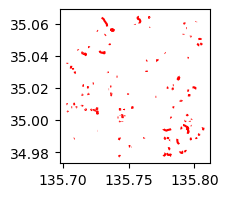

In [12]:
gdf_invalid.plot(color="red",figsize=(2,2))

<Axes: >

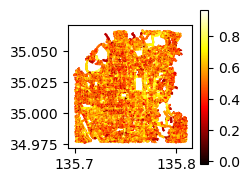

In [13]:
gdf.plot(column="pred",cmap="hot",figsize=(2,2),legend=True)

<Axes: >

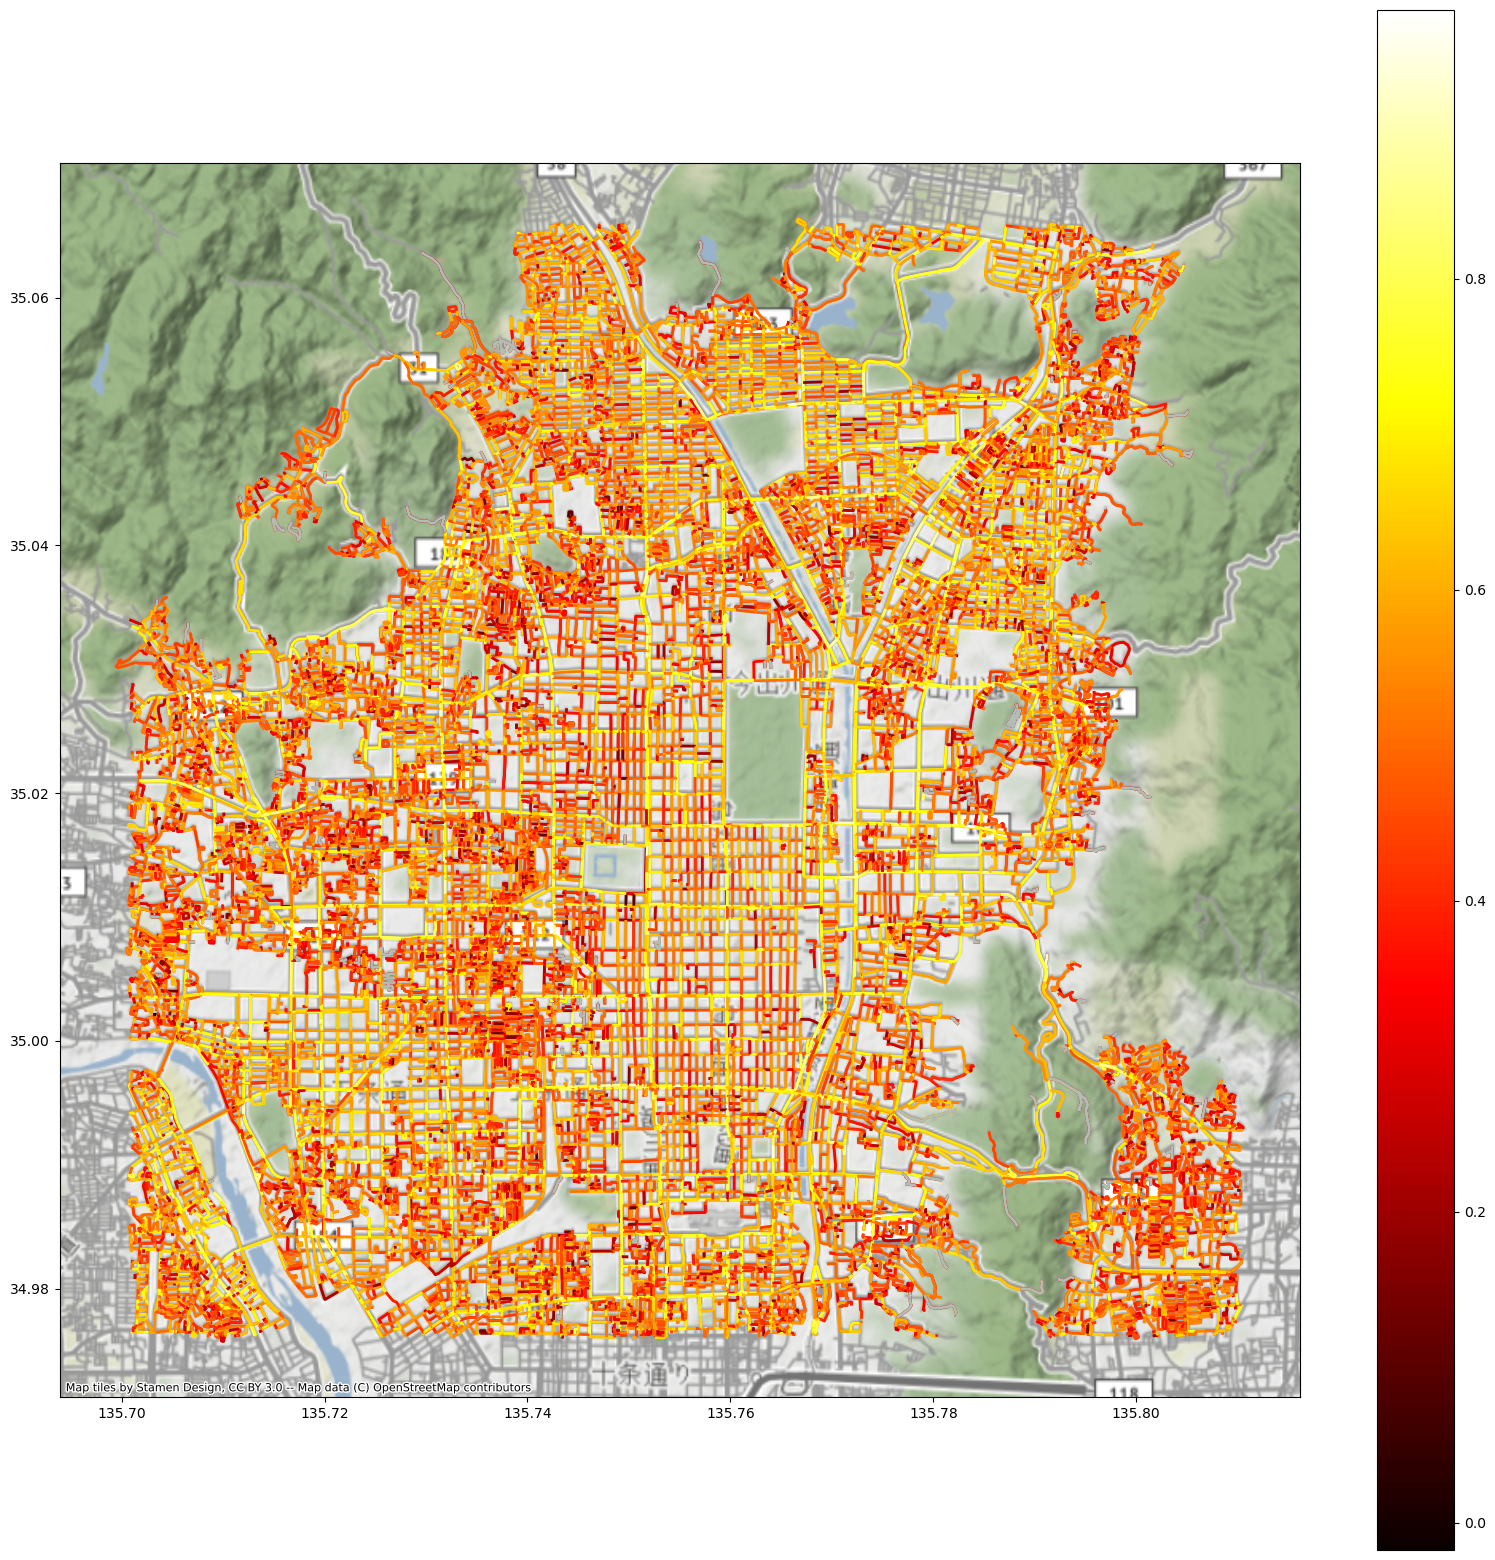

In [14]:
ax = gdf.plot(column="pred",cmap="hot",figsize=(20,20),legend=True,linewidth=2)#,linewidth=2
cx.add_basemap(ax, crs=gdf.crs.to_string())
gdf_invalid.plot(ax=ax,color="#B2BEB5",linewidth=2)
# cx.add_basemap(ax, source=cx.providers.CartoDB.PositronOnlyLabels,crs=gdf.crs.to_string())
#CartoDB.DarkMatterOnlyLabels, VoyagerLabelsUnder https://contextily.readthedocs.io/en/latest/providers_deepdive.html